# Zad 1

In [235]:
from random import uniform
import matplotlib.pyplot as plt
from time import time

In [236]:
def add(tab):
    s = 0
    for x in tab:
        s += x
    return s

def add_recu(tab):
    n = len(tab)
    if n == 0:
        return 0
    elif n == 1:
        return tab[0]
    elif n == 2:
        return tab[0] + tab[1]
    n //= 2
    return add_recu(tab[:n]) + add_recu(tab[n:])

def kahan(tab):
    s = 0
    error = 0
    for x in tab:
        y = x - error
        temp = s + y
        error = (temp - s) - y
        s = temp
    return s

def count_time(func, *args, **kwargs):
    start_time = time()
    func(*args, **kwargs)
    return time() - start_time

In [237]:
# int in python -> 32 bits -> pojedyncza prezycja

N = 10**7
v = uniform(0.1, 0.9)
# v = 0.111111111  # zad 1.7
correct_sum = v*N
tab = [v for _ in range(N)]
sum_using_sum = sum(tab)
sum_left_to_right = add(tab)
print("v =", v)
print("correct_sum:      ", correct_sum)
print("sum_using_sum:    ", sum_using_sum)
print("sum_left_to_right:", sum_left_to_right)

v = 0.5803182087500173
correct_sum:       5803182.087500173
sum_using_sum:     5803182.087798553
sum_left_to_right: 5803182.087798553


In [238]:
# sum_using_sum = sum_left_to_right
wrong_sum = sum_left_to_right
error_abs = abs(correct_sum - wrong_sum)  # bląd bezwzględny
error_rel = error_abs / correct_sum       # błąd względny
print("error_abs:", error_abs)
print("error_rel:", error_rel)

error_abs: 0.00029837992042303085
error_rel: 5.141660487712931e-11


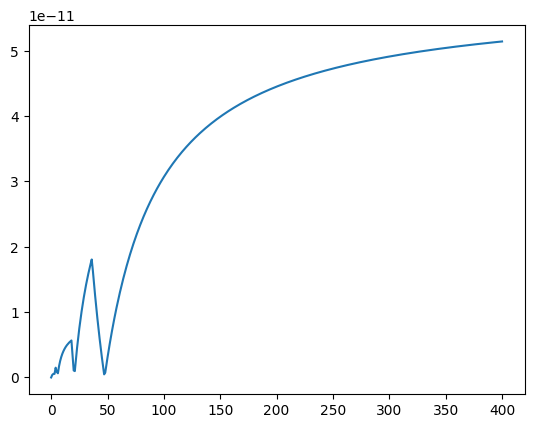

In [239]:
error_abs_tab = [0]
steps = [0]
current_val = 0
for i in range(N):
    current_val += tab[i]
    if (i + 1) % 25000 == 0:
        steps.append((i+1)//25000)
        correct_val = (i+1) * v
        current_abs_error = abs(correct_val - current_val)
        # current_abs_error = correct_val - current_val
        # print(current_abs_error)
        error_abs_tab.append(current_abs_error / correct_val)

plt.plot(steps,error_abs_tab)
plt.show()

In [240]:
sum_recu = add_recu(tab)
error_abs_reku = abs(correct_sum - sum_recu)
error_rel_reku = error_abs_reku / correct_sum

In [241]:
sum_kahan = kahan(tab)
error_abs_kahan = abs(sum_kahan - correct_sum)
error_rel_kahan = error_abs_kahan / correct_sum

In [242]:
print("v =", v, "\n")
print("correct_sum:  ", correct_sum)
print("wrong_sum:    ", wrong_sum)
print("sum_recu:     ", sum_recu)
print("                    absolut                   relative")
print("errors_normal:", error_abs, "   ", error_rel)
print("errors_reku:  ", error_abs_reku, "  ", error_rel_reku)
print("errors_kahan: ", error_abs_kahan, "  ", error_rel_kahan)

v = 0.5803182087500173 

correct_sum:   5803182.087500173
wrong_sum:     5803182.087798553
sum_recu:      5803182.087500172
                    absolut                   relative
errors_normal: 0.00029837992042303085     5.141660487712931e-11
errors_reku:   9.313225746154785e-10    1.6048480998407942e-16
errors_kahan:  0.0    0.0


In [243]:
t1 = count_time(add, tab)
t2 = count_time(add_recu, tab)
t3 = count_time(kahan, tab)

print("v =", v, "\n")
print("time of normal add func:", t1, "s")
print("time of reku add func:  ", t2, "s")
print("time of kahan add func: ", t3, "s")


v = 0.5803182087500173 

time of normal add func: 0.28690600395202637 s
time of reku add func:   3.624837875366211 s
time of kahan add func:  0.8007431030273438 s
